## Plot selfish behaviour in Ingolstadt

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
import re
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))

from routerl.services.plotter import running_average


def extract_episode_number(filename):
    """Extract numeric part from the filename using regex."""
    match = re.search(r'\d+', filename)  # Find first number in filename
    return int(match.group()) if match else float('inf')  # Assign large number if no number found

def visualize_mean_travel_times(experiment_folders: list, legend_labels: list, colors: list, line_width: int, 
                                tick_label_size: int, label_size: int, title_size: int, legend_font_size: int, 
                                smooth_by: int, phases: list = None, phase_names: list = None, phase_colors: list = None) -> None:
    """Visualize the mean travel times for multiple experiments.

    Args:
        experiment_folders (list): List of paths to experiment folders.
        legend_labels (list): List of legend labels corresponding to each experiment.
        colors (list): List of colors for the experiments.
        line_width (int): Line width for the plots.
        tick_label_size (int): Font size for tick labels.
        label_size (int): Font size for axis labels.
        title_size (int): Font size for the title.
        legend_font_size (int): Font size for the legend.
        smooth_by (int): Number of episodes to smooth the rewards.
        phases (list, optional): List of phase change episode indices.
        phase_names (list, optional): Names corresponding to each phase.
        phase_colors (list, optional): Colors for phase markers.

    Returns:
        None
    """

    if len(legend_labels) != len(experiment_folders):
        raise ValueError("The number of legend labels must match the number of experiment folders.")

    plt.figure(figsize=(10, 6), layout='tight')

    for idx, (folder, label) in enumerate(zip(experiment_folders, legend_labels)):
        csv_files = sorted(
            [f for f in os.listdir(folder) if f.endswith('.csv')],
            key=extract_episode_number
        )

        episodes = []
        mean_travel_times = []

        for ep, csv_file in enumerate(csv_files):
            file_path = os.path.join(folder, csv_file)
            df = pd.read_csv(file_path)

            # Filter for AV agents and compute mean travel time
            av_rewards = df[df["kind"] == "AV"]["reward"]
            if not av_rewards.empty:
                mean_travel_times.append(av_rewards.mean())
                episodes.append(ep)

        smoothed_travel_times = running_average(mean_travel_times, last_n=smooth_by)
        plt.plot(episodes, smoothed_travel_times, color=colors[idx], label=label, linewidth=line_width)

    if phases and phase_names and phase_colors:
        for phase_idx, phase in enumerate(phases):
            color = phase_colors[phase_idx % len(phase_colors)]
            plt.axvline(x=phase, label=phase_names[phase_idx], linestyle='--', color=color, linewidth=line_width)

    plt.xticks(fontsize=tick_label_size)
    plt.yticks(fontsize=tick_label_size)
    plt.xlabel('Episode', fontsize=label_size)
    plt.ylabel('Mean Travel Time', fontsize=label_size)
    plt.grid(True, axis='y')
    plt.title('Mean Travel Times Over Episodes', fontsize=title_size, fontweight='bold')
    plt.legend(fontsize=legend_font_size)

    plt.show()
    plt.close()


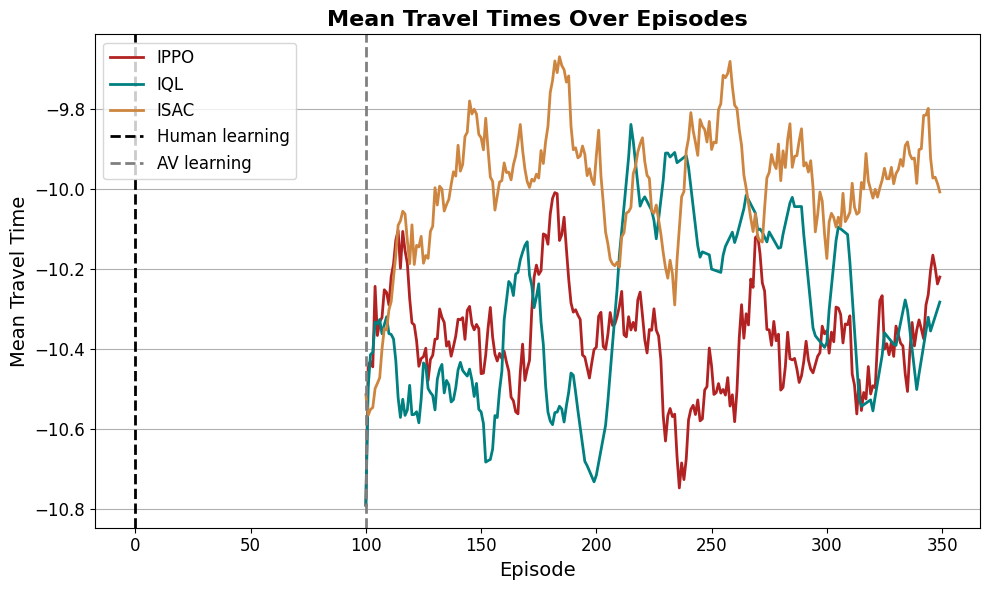

In [33]:
visualize_mean_travel_times(
    experiment_folders=[
        "training_records_selfish_ippo_ingolstadt/episodes",
        "training_records_selfish_iql_ingolstadt/episodes",
        "training_records_selfish_isac_ingolstadt/episodes"
    ],
    legend_labels=["IPPO", "IQL", "ISAC"],  # Custom legend names
     colors = [
        "firebrick", "teal", "peru", "navy", 
        "salmon", "slategray", "darkviolet", 
        "goldenrod", "darkolivegreen", "black"],
    line_width=2,
    tick_label_size=12,
    label_size=14,
    title_size=16,
    legend_font_size=12,
    smooth_by=10,
    phases=[0, 100],  # Example phase change indices
    phase_names=["Human learning", "AV learning"],
    phase_colors=["black", "gray", "purple"]
)


## Plot malicious behaviour in Cologne

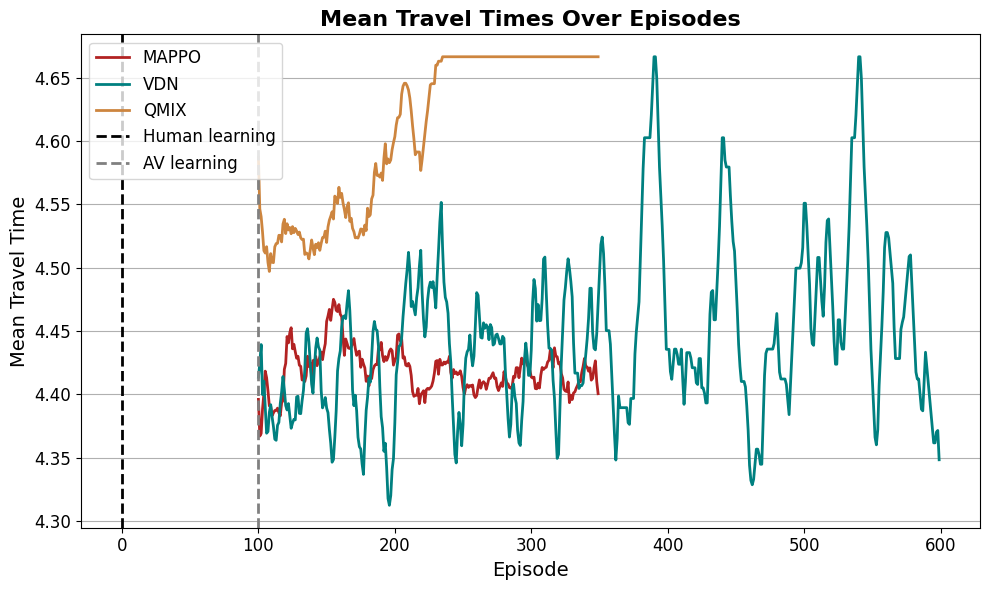

In [36]:
visualize_mean_travel_times(
    experiment_folders=[
        "training_records_malicious_mappo_cologne/episodes",
        "training_records_malicious_vdn_cologne/episodes",
        "training_records_malicious_qmix_cologne/episodes"
    ],
    legend_labels=["MAPPO", "VDN", "QMIX"],  # Custom legend names
     colors = [
        "firebrick", "teal", "peru", "navy", 
        "salmon", "slategray", "darkviolet", 
        "goldenrod", "darkolivegreen", "black"],
    line_width=2,
    tick_label_size=12,
    label_size=14,
    title_size=16,
    legend_font_size=12,
    smooth_by=10,
    phases=[0, 100],  # Example phase change indices
    phase_names=["Human learning", "AV learning"],
    phase_colors=["black", "gray", "purple"]
)
